## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [7]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
os_name = os.name

if os_name == 'nt':
    password = os.getenv('NEO4J_Password')
    neo4j_directory = os.getenv('NEO4J_Directory')
else:
    password = os.environ['NEO4J_Password']
    neo4j_directory = os.environ['NEO4J_Directory']

In [9]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

In [10]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

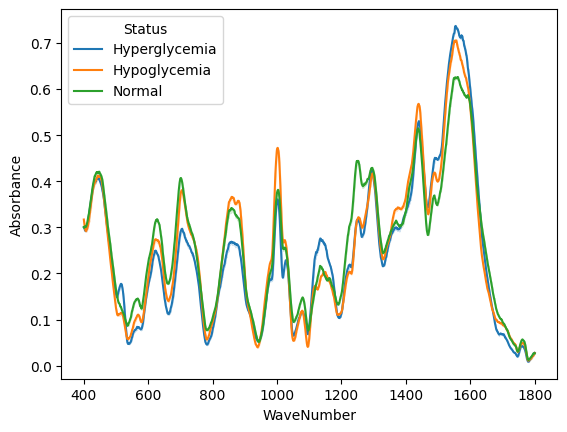

In [40]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

In [42]:
sample = df[df['SurID'] == '210526-3']

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

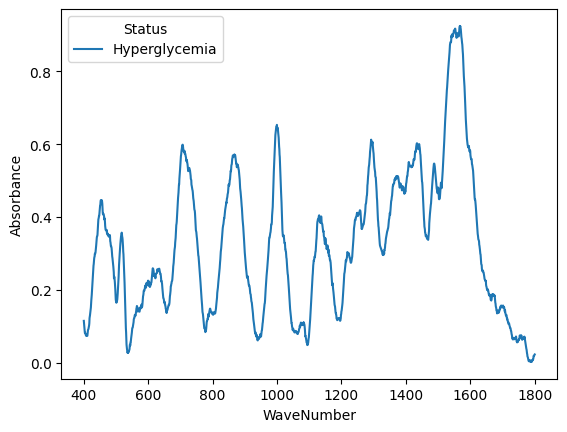

In [43]:
sns.lineplot(data=sample, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

In [44]:
sample2 = df[df['SurID'] == '210210-1']

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

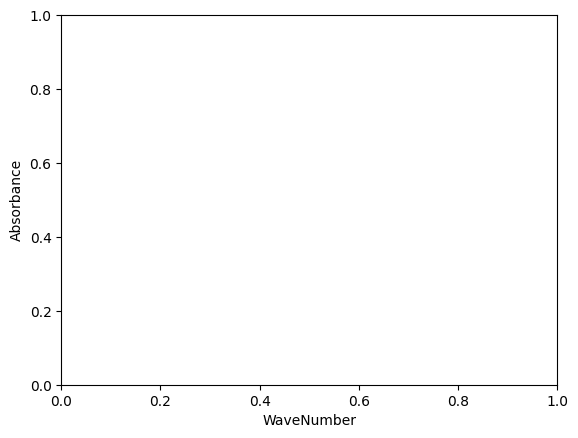

In [45]:
sns.lineplot(data=sample2, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [12]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,0.241429
1,201210-1-00,294,400.91116,201210-1,Normal,0.241086
2,201210-1-00,295,401.59454,201210-1,Normal,0.240729
3,201210-1-00,296,402.27789,201210-1,Normal,0.240359
4,201210-1-00,297,402.96127,201210-1,Normal,0.239978
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,0.060284
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,0.064627
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,0.069153
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,0.073864


In [13]:
df = df.groupby(["WaveNumber", "Status", "SurID"])["Absorbance"].median().reset_index()

In [14]:
pivoted_df = df.pivot(index='SurID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SurID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SurID')
pivoted_df = pivoted_df.set_index('SurID')

In [15]:
pivoted_df

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,0.031138,0.029919,0.028575,0.023878,0.018957,0.015237,0.017187,0.011286,0.012493,0.016805,...,0.107936,0.106570,0.104612,0.100352,0.094964,0.089017,0.082489,0.075354,0.067589,Normal
201210-2,0.163228,0.154766,0.146287,0.136697,0.138430,0.135132,0.127527,0.128915,0.117746,0.118999,...,0.008499,0.005828,0.005841,0.003547,0.004630,0.007988,0.007847,0.007901,0.008981,Normal
210114-1,0.319346,0.329588,0.341867,0.344507,0.348102,0.355612,0.356593,0.359882,0.362588,0.360557,...,-0.019425,-0.018795,-0.017404,-0.015758,-0.014743,-0.015484,-0.014328,-0.011066,-0.005283,Normal
210114-2,0.228455,0.229143,0.231315,0.243294,0.247816,0.250269,0.253692,0.253781,0.252133,0.253112,...,0.002634,0.006105,0.008581,0.011755,0.013113,0.012840,0.012072,0.013795,0.012787,Normal
210120-1,0.263952,0.269194,0.270594,0.268664,0.273377,0.264040,0.250184,0.243790,0.237548,0.235103,...,0.002750,0.004640,0.006453,0.007952,0.009297,0.014721,0.016196,0.020181,0.021458,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.260097,0.263270,0.262096,0.263874,0.270131,0.272509,0.272424,0.273210,0.276513,0.280774,...,0.007400,0.007465,0.008291,0.009798,0.009066,0.009376,0.009859,0.010006,0.009960,Hyperglycemia
210524-1,0.060594,0.067782,0.066554,0.058945,0.053572,0.049689,0.050858,0.051550,0.049164,0.046631,...,-0.007441,-0.007470,-0.010225,-0.010071,-0.012320,-0.006250,-0.004451,-0.003595,-0.002634,Hypoglycemia
210526-1,0.082592,0.078436,0.069522,0.058748,0.051484,0.045021,0.040560,0.037142,0.032200,0.028672,...,0.022184,0.024385,0.026992,0.026789,0.029850,0.029812,0.031270,0.032967,0.031355,Hyperglycemia


In [16]:
status_df = pivoted_df['Status']

In [17]:
status_df = status_df.reset_index()

In [18]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SurID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], distance=10, width=10)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [19]:
print(len(peaks))

1118


Below shows a scatterplot of the coordinates of all the peaks we have found

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

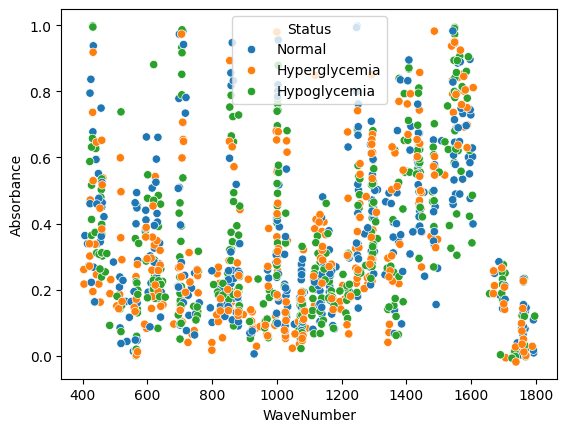

In [20]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [21]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

/tmp/ipykernel_10955/2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
/tmp/ipykernel_10955/2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [22]:
peak_df

,WaveNumber,Status,SurID,Absorbance,Widths,Prominences
6089,465.83142,Normal,201210-1,0.420900,77.797995,0.274191
15728,570.38727,Normal,201210-1,0.288462,13.759219,0.031381
19823,614.80640,Normal,201210-1,0.507696,71.093159,0.337980
27572,698.86102,Normal,201210-1,0.973090,60.527851,0.951079
43763,874.48749,Normal,201210-1,0.518654,139.350849,0.473815
...,...,...,...,...,...,...
100251,1487.47160,Hyperglycemia,210526-3,0.546820,16.610337,0.098065
107622,1567.42600,Hyperglycemia,210526-3,0.924731,152.561504,0.897893
117009,1669.24830,Hyperglycemia,210526-3,0.188305,13.374137,0.017316
119970,1701.36670,Hyperglycemia,210526-3,0.157168,22.372686,0.021788


In [23]:
peaks = [[407, 495], [453,454], [516,537], 519, [603,738], [620, 624], [821, 839], [866, 887], 972, [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], 1170, [1188, 1196], [1212-1294], [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], 1668]

In [24]:
# Peaks list, corrected format
peaks_corrected = [[407, 495], [453, 454], [516, 537], [519, 519], [603, 738], [620, 624], [821, 839], [866, 887], [972, 972], 
         [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], [1170, 1170], [1188, 1196], [1212, 1294], 
         [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], [1668, 1668]]

# Convert peaks to a more efficient structure for processing
peak_ranges = [(peak[0], peak[1]) for peak in peaks_corrected]

# Create a function to determine the peak range for each WaveNumber
def find_peak_range(wavenumber):
    for start, end in peak_ranges:
        if start <= wavenumber <= end:
            return f"{start}-{end}"
    return None

# Apply the function to create a new column for peak range
peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)

# Now, group by both SpecID and the new PeakRange column, and compute max Absorbance for each group
grouped = peak_df.groupby(['SurID', 'PeakRange'])['Absorbance'].max().reset_index()

# Pivot the table to have SpecID as rows and PeakRange as columns, filled with max Absorbance values
efficient_pivot_df = grouped.pivot(index='SurID', columns='PeakRange', values='Absorbance').reset_index()

# Fill NaN values with an appropriate placeholder if needed (e.g., 0 or empty string), here we keep NaNs
efficient_pivot_df

/tmp/ipykernel_10955/4027960324.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)


PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,NaN,NaN,NaN,0.152375,NaN,0.338212,0.388207,NaN,NaN,0.458368,0.420900,NaN,0.973090,NaN,0.518654
1,201210-2,0.564002,NaN,NaN,0.220543,NaN,0.501415,0.592260,NaN,NaN,0.885689,0.372915,NaN,0.705260,NaN,NaN
2,210114-1,NaN,NaN,NaN,NaN,NaN,0.799282,0.468651,NaN,NaN,0.732885,0.363800,0.164764,0.326142,NaN,0.167593
3,210114-2,0.183515,NaN,NaN,NaN,NaN,0.518828,0.392406,NaN,NaN,0.620255,0.272916,NaN,0.220313,NaN,0.090670
4,210120-1,NaN,NaN,0.104215,NaN,NaN,0.324791,NaN,NaN,NaN,0.698434,0.217298,NaN,0.167244,0.108148,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.461721,NaN,NaN,NaN,NaN,0.094122,0.499600,NaN,NaN,0.845260,0.339073,NaN,0.359131,NaN,0.187332
59,210524-1,NaN,NaN,0.122788,NaN,NaN,0.535428,0.697573,NaN,NaN,0.892985,0.311815,0.737994,0.462762,NaN,0.466796
60,210526-1,NaN,NaN,NaN,0.289644,NaN,0.549350,NaN,NaN,NaN,0.951667,0.383706,0.290797,0.706730,NaN,NaN
61,210526-2,0.979442,NaN,NaN,0.427333,NaN,0.640155,NaN,NaN,NaN,0.948704,0.652104,0.496401,0.973244,NaN,NaN


In [25]:
# Replace all NaN values with 0
efficient_pivot_df_filled = efficient_pivot_df.fillna(0)

efficient_pivot_df_filled

PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,0.000000,0.0,0.000000,0.152375,0.0,0.338212,0.388207,0.0,0.0,0.458368,0.420900,0.000000,0.973090,0.000000,0.518654
1,201210-2,0.564002,0.0,0.000000,0.220543,0.0,0.501415,0.592260,0.0,0.0,0.885689,0.372915,0.000000,0.705260,0.000000,0.000000
2,210114-1,0.000000,0.0,0.000000,0.000000,0.0,0.799282,0.468651,0.0,0.0,0.732885,0.363800,0.164764,0.326142,0.000000,0.167593
3,210114-2,0.183515,0.0,0.000000,0.000000,0.0,0.518828,0.392406,0.0,0.0,0.620255,0.272916,0.000000,0.220313,0.000000,0.090670
4,210120-1,0.000000,0.0,0.104215,0.000000,0.0,0.324791,0.000000,0.0,0.0,0.698434,0.217298,0.000000,0.167244,0.108148,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.461721,0.0,0.000000,0.000000,0.0,0.094122,0.499600,0.0,0.0,0.845260,0.339073,0.000000,0.359131,0.000000,0.187332
59,210524-1,0.000000,0.0,0.122788,0.000000,0.0,0.535428,0.697573,0.0,0.0,0.892985,0.311815,0.737994,0.462762,0.000000,0.466796
60,210526-1,0.000000,0.0,0.000000,0.289644,0.0,0.549350,0.000000,0.0,0.0,0.951667,0.383706,0.290797,0.706730,0.000000,0.000000
61,210526-2,0.979442,0.0,0.000000,0.427333,0.0,0.640155,0.000000,0.0,0.0,0.948704,0.652104,0.496401,0.973244,0.000000,0.000000


In [26]:
# Add back "Status" and "SurID" columns by joining on "SpecID"
# First, create a DataFrame with unique SpecID, Status, and SurID
status_surid_df = peak_df[['Status', 'SurID']].drop_duplicates()

# Merge this back into the efficient pivot table
pivot_df_with_status_surid = efficient_pivot_df_filled.merge(status_surid_df, on='SurID', how='left')

pivot_df_with_status_surid

,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887,Status
0,201210-1,0.000000,0.0,0.000000,0.152375,0.0,0.338212,0.388207,0.0,0.0,0.458368,0.420900,0.000000,0.973090,0.000000,0.518654,Normal
1,201210-2,0.564002,0.0,0.000000,0.220543,0.0,0.501415,0.592260,0.0,0.0,0.885689,0.372915,0.000000,0.705260,0.000000,0.000000,Normal
2,210114-1,0.000000,0.0,0.000000,0.000000,0.0,0.799282,0.468651,0.0,0.0,0.732885,0.363800,0.164764,0.326142,0.000000,0.167593,Normal
3,210114-2,0.183515,0.0,0.000000,0.000000,0.0,0.518828,0.392406,0.0,0.0,0.620255,0.272916,0.000000,0.220313,0.000000,0.090670,Normal
4,210120-1,0.000000,0.0,0.104215,0.000000,0.0,0.324791,0.000000,0.0,0.0,0.698434,0.217298,0.000000,0.167244,0.108148,0.000000,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.461721,0.0,0.000000,0.000000,0.0,0.094122,0.499600,0.0,0.0,0.845260,0.339073,0.000000,0.359131,0.000000,0.187332,Hyperglycemia
59,210524-1,0.000000,0.0,0.122788,0.000000,0.0,0.535428,0.697573,0.0,0.0,0.892985,0.311815,0.737994,0.462762,0.000000,0.466796,Hypoglycemia
60,210526-1,0.000000,0.0,0.000000,0.289644,0.0,0.549350,0.000000,0.0,0.0,0.951667,0.383706,0.290797,0.706730,0.000000,0.000000,Hyperglycemia
61,210526-2,0.979442,0.0,0.000000,0.427333,0.0,0.640155,0.000000,0.0,0.0,0.948704,0.652104,0.496401,0.973244,0.000000,0.000000,Hyperglycemia


In [27]:
node_df = pivot_df_with_status_surid[['Status', 'SurID']]
node_df.rename(columns={'SurID':'SurID:ID', 'Status':'Status:LABEL'}, inplace=True)

/tmp/ipykernel_10955/2102331677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_df.rename(columns={'SurID':'SurID:ID', 'Status':'Status:LABEL'}, inplace=True)


In [28]:
node_df.to_csv(f"{neo4j_directory}/import/nodes.csv", index=False)

In [29]:
features_df = pivot_df_with_status_surid.drop(['SurID', 'Status', 'SurID'], axis=1)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_df)

# If you want to convert it to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_df_with_status_surid['SurID'], columns=pivot_df_with_status_surid['SurID'])

In [31]:
cosine_sim_df

SurID,201210-1,201210-2,210114-1,210114-2,210120-1,210120-2,210121-1,210121-2,210211-1,210211-2,...,210510-2,210511-1,210518-1,210519-1,210519-2,210519-3,210524-1,210526-1,210526-2,210526-3
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,1.000000,0.791271,0.752714,0.728648,0.598445,0.851396,0.532568,0.595988,0.560087,0.627520,...,0.653398,0.666694,0.699173,0.742358,0.772391,0.722383,0.751187,0.774746,0.698432,0.870279
201210-2,0.791271,1.000000,0.842595,0.919871,0.762925,0.942590,0.721690,0.716403,0.739374,0.821637,...,0.799491,0.658879,0.656488,0.856752,0.933209,0.925527,0.759640,0.829509,0.877677,0.830164
210114-1,0.752714,0.842595,1.000000,0.966827,0.837610,0.851042,0.689360,0.685178,0.718851,0.798322,...,0.767094,0.630272,0.737249,0.914142,0.826031,0.763160,0.883804,0.840933,0.702913,0.935056
210114-2,0.728648,0.919871,0.966827,1.000000,0.851154,0.917470,0.718112,0.703815,0.745617,0.840815,...,0.811137,0.654356,0.643360,0.919363,0.905209,0.873247,0.829816,0.809658,0.750119,0.900262
210120-1,0.598445,0.762925,0.837610,0.851154,1.000000,0.706218,0.862873,0.813272,0.885672,0.834702,...,0.895149,0.377732,0.380800,0.667605,0.783089,0.750003,0.704822,0.883633,0.700571,0.776429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.722383,0.925527,0.763160,0.873247,0.750003,0.947797,0.681733,0.670359,0.703500,0.824100,...,0.796036,0.616805,0.455981,0.783083,0.954417,1.000000,0.766483,0.720333,0.771870,0.825956
210524-1,0.751187,0.759640,0.883804,0.829816,0.704822,0.819254,0.610868,0.589080,0.624157,0.746874,...,0.659014,0.564632,0.738647,0.821607,0.778717,0.766483,1.000000,0.778337,0.671652,0.957554
210526-1,0.774746,0.829509,0.840933,0.809658,0.883633,0.737834,0.852077,0.840248,0.872944,0.776179,...,0.861627,0.429550,0.641709,0.717413,0.762795,0.720333,0.778337,1.000000,0.857570,0.834031


In [32]:
kernel_df = cosine_sim_df

In [46]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SurID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SurID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

In [34]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]

In [47]:
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
0,201210-1,201210-1,1.000000,LINK
1,201210-2,201210-1,0.791271,LINK
2,210114-1,201210-1,0.752714,LINK
3,210114-2,201210-1,0.728648,LINK
4,210120-1,201210-1,0.598445,LINK
...,...,...,...,...
3964,210519-3,210526-3,0.825956,LINK
3965,210524-1,210526-3,0.957554,LINK
3966,210526-1,210526-3,0.834031,LINK
3967,210526-2,210526-3,0.712487,LINK


In [36]:
node_df

,Status:LABEL,SurID:ID
0,Normal,201210-1
1,Normal,201210-2
2,Normal,210114-1
3,Normal,210114-2
4,Hyperglycemia,210120-1
...,...,...
58,Hyperglycemia,210519-3
59,Hypoglycemia,210524-1
60,Hyperglycemia,210526-1
61,Hyperglycemia,210526-2


In [37]:
relationship_df.to_csv(f"{neo4j_directory}/import/relationships.csv", index=False)

In [38]:
from neo4j import GraphDatabase
import os
import pandas as pd
import shutil
import subprocess

This moves the nodes and relationships files from data/current_working_graph into the DBMS import folder.

At the moment this uses local paths, but the rest should be automated.

Then run the admin import command.

In [39]:
os_name = os.name

if os_name == 'nt':
    working_dir = f'{neo4j_directory}/bin'
    command = 'neo4j-admin database import full --nodes=import/nodes.csv --relationships=import/relationships.csv --overwrite-destination neo4j'
    result = subprocess.run(command, shell=True, cwd=working_dir, capture_output=True, text=True)
else:
    working_dir = f'{neo4j_directory}'
    command = [
    './bin/neo4j-admin', 'database', 'import', 'full',
    '--nodes=import/nodes.csv',
    '--relationships=import/relationships.csv',
    '--overwrite-destination',  'neo4j'
    ]
    result = subprocess.run(command, cwd=working_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


# Check if the command was successful
if result.returncode == 0:
    print("Import successful")
    print(result.stdout)
else:
    print("Error during import:")
    print(result.stderr)

Import successful
b"Neo4j version: 5.12.0\nImporting the contents of these files into /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/data/databases/neo4j:\nNodes:\n  /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/nodes.csv\n\nRelationships:\n  /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/relationships.csv\n\n\nAvailable resources:\n  Total machine memory: 15.47GiB\n  Free machine memory: 716.3MiB\n  Max heap memory : 910.5MiB\n  Max worker threads: 8\n  Configured max memory: 335.1MiB\n  High parallel IO: true\n\nCypher type normalization is enabled (disable with --normalize-types=false):\n  Property type of 'Weight' normalized from 'float' --> 'double' in /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/relationships.csv\n\nImport s

In [ ]:
if os_name != 'nt':
    command = [
        './bin/neo4j', 'restart'
    ]

    result = subprocess.run(command, cwd=neo4j_directory, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Check if the command was successful
    if result.returncode == 0:
        print("Restart successful")
        print(result.stdout)
    else:
        print("Error during restart:")
        print(result.stderr)

Run and connect to the Neo4j Database

In [55]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"              # Neo4J username
#Password defined at the top of the notebook

# Create a driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Ensure you close the driver connection when your program ends
def close_driver():
    driver.close()

**First create the gds Graph Projection**

In [56]:
def project_graph(tx):
    query = """
    CALL gds.graph.project(
      'myGraph', 
      ['Normal', 'Hyperglycemia', 'Hypoglycemia'],
      {
        LINK: {
          orientation: 'UNDIRECTED',
          properties: 'Weight'
        }
      }
    )
    """
    tx.run(query)

# Use a session to execute the graph projection
with driver.session() as session:
    session.execute_write(project_graph)

Define the graph algorithms.

In [57]:
def run_pagerank_centrality(tx):
    query = """
    CALL gds.pageRank.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [58]:
def run_degree_centrality(tx):
    query = """
    CALL gds.degree.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [59]:
def run_eigenvector_centrality(tx):
    query = """
    CALL gds.eigenvector.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [60]:
def run_articlerank_centrality(tx):
    query = """
    CALL gds.articleRank.stream('myGraph', {
        relationshipWeightProperty: 'Weight'
    })
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).SurID AS name, score
    ORDER BY score DESC, name ASC
    """
    results = tx.run(query)
    return [(record["name"], record["score"]) for record in results]

In [61]:
def run_label_propagation_algorithm(tx):
    query = """
    CALL gds.labelPropagation.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [62]:
def run_leiden_algorithm(tx):
    query = """
    CALL gds.leiden.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [63]:
def run_louvain_algorithm(tx):
    query = """
    CALL gds.louvain.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, communityId AS Community
    RETURN gds.util.asNode(nodeId).SurID AS name, Community
    ORDER BY Community, name
    """
    results = tx.run(query)
    return [(record["name"], record["Community"]) for record in results]

In [64]:
def run_node2vec_algorithm(tx):
    query = """
    CALL gds.node2vec.stream('myGraph', { relationshipWeightProperty: 'Weight' })
    YIELD nodeId, embedding
    RETURN gds.util.asNode(nodeId).SurID AS name, embedding
    """
    results = tx.run(query)
    return [(record["name"], record["embedding"]) for record in results]

In [65]:
def run_fastRP_algorithm(tx):
    query = """
    CALL gds.fastRP.stream('myGraph',
        { relationshipWeightProperty: 'Weight',
         randomSeed:1234,
         embeddingDimension: 128
        }
    )
    YIELD nodeId, embedding
    RETURN gds.util.asNode(nodeId).SurID AS name, embedding
    """
    results = tx.run(query)
    return [(record["name"], record["embedding"]) for record in results]

Execute the algorithms and store the results in a Dataframe.

In [66]:
# Use a session to execute the queries and retrieve the results
with driver.session() as session:
    pagerank_results = session.execute_read(run_pagerank_centrality)
    degree_results = session.execute_read(run_degree_centrality)
    eigenvector_results = session.execute_read(run_eigenvector_centrality)
    articlerank_results = session.execute_read(run_articlerank_centrality)
    label_propagation_results = session.execute_read(run_label_propagation_algorithm)
    leiden_results = session.execute_read(run_leiden_algorithm)
    louvain_results = session.execute_read(run_louvain_algorithm)

In [67]:
pagerank_df = pd.DataFrame(pagerank_results, columns=['name', 'PageRank'])
degree_df = pd.DataFrame(degree_results, columns=['name', 'DegreeCentrality'])
eigenvector_df = pd.DataFrame(eigenvector_results, columns=['name', 'EigenvectorCentrality'])
articlerank_df = pd.DataFrame(articlerank_results, columns=['name', 'ArticleRank'])
label_propagation_df = pd.DataFrame(label_propagation_results, columns=['name', 'LabelPropagation'])
leiden_df = pd.DataFrame(leiden_results, columns=['name', 'Leiden'])
louvain_df = pd.DataFrame(louvain_results, columns=['name', 'Louvain'])

In [68]:
merged_df = pagerank_df
for df in [degree_df, eigenvector_df, articlerank_df, leiden_df, louvain_df]:
    merged_df = pd.merge(merged_df, df, on=['name'], how='left')

In [69]:
df = merged_df.rename(columns={'name' : 'SurID'})
df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18
...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18


In [70]:
with driver.session() as session:
    fastRP_results = session.execute_read(run_fastRP_algorithm)

fastRP_df = pd.DataFrame(fastRP_results, columns=['SurID', 'embeddings'])

# Expand the embeddings list into separate columns
embeddings_df = pd.DataFrame(fastRP_df['embeddings'].tolist(), index=fastRP_df.index)

# Optionally, rename the new columns
embeddings_df.columns = [f'embedding_{i}' for i in range(embeddings_df.shape[1])]

# Join the new embeddings columns to the original DataFrame
fastRP_df = pd.concat([fastRP_df.drop(['embeddings'], axis=1), embeddings_df], axis=1)
fastRP_df.to_csv('../../data/fastRP_embeddings.csv', index=False)
fastRP_df.head()

,SurID,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127
0,201210-1,0.148074,0.062992,-0.086053,-0.013960,-0.094132,0.093681,-0.076875,0.099170,-0.104518,...,0.362389,-0.045680,-0.114490,0.136893,-0.061356,-0.126552,-0.119260,-0.119269,-0.084268,0.051636
1,201210-2,0.148044,0.063032,-0.086974,-0.013786,-0.092909,0.094044,-0.076408,0.099270,-0.103982,...,0.362324,-0.046032,-0.112472,0.136427,-0.061472,-0.126235,-0.118634,-0.120265,-0.085383,0.052064
2,210114-1,0.147864,0.062416,-0.086824,-0.013481,-0.093673,0.094785,-0.076168,0.099154,-0.103975,...,0.362557,-0.046539,-0.112776,0.136170,-0.061643,-0.126523,-0.119153,-0.119744,-0.084853,0.051985
3,210114-2,0.147349,0.062351,-0.086448,-0.013313,-0.093593,0.094751,-0.076623,0.099181,-0.103776,...,0.362583,-0.046065,-0.113099,0.136091,-0.061563,-0.127183,-0.118543,-0.119781,-0.085047,0.052079
4,210120-1,0.148864,0.065607,-0.086003,-0.013842,-0.091871,0.094693,-0.076708,0.098820,-0.106134,...,0.361995,-0.046259,-0.110904,0.137079,-0.061162,-0.125793,-0.119311,-0.122582,-0.086542,0.052334


In [71]:
status_df

,SurID,Status
0,201210-1,Normal
1,201210-2,Normal
2,210114-1,Normal
3,210114-2,Normal
4,210120-1,Hyperglycemia
...,...,...
58,210519-3,Hyperglycemia
59,210524-1,Hypoglycemia
60,210526-1,Hyperglycemia
61,210526-2,Hyperglycemia


In [72]:
df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18
...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18


In [73]:
graph_df = pd.merge(df, status_df, left_on="SurID", right_on="SurID", how="inner")

In [74]:
fast_graph_df = pd.merge(fastRP_df, status_df, left_on="SurID", right_on="SurID", how="inner")

In [75]:
graph_df.rename(columns={"Status:LABEL":"Status"}, inplace=True)

In [76]:
fast_graph_df.rename(columns={"Status:LABEL":"Status"}, inplace=True)

In [77]:
fast_graph_df

,SurID,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,Status
0,201210-1,0.148074,0.062992,-0.086053,-0.013960,-0.094132,0.093681,-0.076875,0.099170,-0.104518,...,-0.045680,-0.114490,0.136893,-0.061356,-0.126552,-0.119260,-0.119269,-0.084268,0.051636,Normal
1,201210-2,0.148044,0.063032,-0.086974,-0.013786,-0.092909,0.094044,-0.076408,0.099270,-0.103982,...,-0.046032,-0.112472,0.136427,-0.061472,-0.126235,-0.118634,-0.120265,-0.085383,0.052064,Normal
2,210114-1,0.147864,0.062416,-0.086824,-0.013481,-0.093673,0.094785,-0.076168,0.099154,-0.103975,...,-0.046539,-0.112776,0.136170,-0.061643,-0.126523,-0.119153,-0.119744,-0.084853,0.051985,Normal
3,210114-2,0.147349,0.062351,-0.086448,-0.013313,-0.093593,0.094751,-0.076623,0.099181,-0.103776,...,-0.046065,-0.113099,0.136091,-0.061563,-0.127183,-0.118543,-0.119781,-0.085047,0.052079,Normal
4,210120-1,0.148864,0.065607,-0.086003,-0.013842,-0.091871,0.094693,-0.076708,0.098820,-0.106134,...,-0.046259,-0.110904,0.137079,-0.061162,-0.125793,-0.119311,-0.122582,-0.086542,0.052334,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.147535,0.062793,-0.086827,-0.013634,-0.093383,0.093621,-0.076320,0.099288,-0.104212,...,-0.046118,-0.112944,0.136373,-0.061016,-0.126432,-0.118645,-0.120671,-0.084766,0.052149,Hyperglycemia
59,210524-1,0.148089,0.063263,-0.086243,-0.013925,-0.093347,0.094211,-0.076082,0.099329,-0.104206,...,-0.045913,-0.113085,0.135863,-0.061051,-0.126128,-0.118741,-0.119799,-0.085271,0.051936,Hypoglycemia
60,210526-1,0.149026,0.064424,-0.085681,-0.014899,-0.091819,0.093848,-0.077155,0.099565,-0.105782,...,-0.046011,-0.111519,0.137123,-0.061071,-0.125619,-0.119364,-0.121773,-0.087036,0.052698,Hyperglycemia
61,210526-2,0.149709,0.064195,-0.085909,-0.015113,-0.093363,0.093056,-0.077332,0.099563,-0.105623,...,-0.045630,-0.113384,0.136593,-0.060970,-0.126464,-0.119272,-0.120642,-0.085524,0.051788,Hyperglycemia


In [78]:
graph_df

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain,Status
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18,Hyperglycemia
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18,Hypoglycemia
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18,Normal
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18,Normal
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18,Hypoglycemia
...,...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43,Normal
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43,Hypoglycemia
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18,Normal
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18,Hyperglycemia


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GroupKFold
import numpy as np

def evaluate_et_rf(df):
    # Splitting the dataframe into features (X) and target variable (y)
    X = df.drop(['Status', 'SurID'], axis=1)
    y = df['Status']

    # Creating the classifiers
    rf = RandomForestClassifier(random_state=1234)
    et = ExtraTreesClassifier(random_state=1234)

    # Combining the classifiers into a list
    classifiers = [rf, et]

    # Performing 10-fold cross-validation for each classifier
    for clf in classifiers:
        
        # Using StratifiedKFold for classification tasks
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
        
        # Getting cross-validation scores
        scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        
        # Displaying the results
        print(f'{clf.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [85]:
evaluate_et_rf(graph_df)

RandomForestClassifier Cross-Validation Accuracy: 0.2357 +/- 0.2191
ExtraTreesClassifier Cross-Validation Accuracy: 0.2667 +/- 0.2601


## FastRp

In [86]:
evaluate_et_rf(fast_graph_df)

RandomForestClassifier Cross-Validation Accuracy: 0.2095 +/- 0.2100
ExtraTreesClassifier Cross-Validation Accuracy: 0.3643 +/- 0.2431


Fast rp mixed with traditional graph metrics

In [87]:
joined_graph = pd.merge(graph_df, fast_graph_df, on=['Status', 'SurID'], how='inner')

In [88]:
joined_graph

,SurID,PageRank,DegreeCentrality,EigenvectorCentrality,ArticleRank,Leiden,Louvain,Status,embedding_0,embedding_1,...,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127
0,210120-2,1.066556,50.933572,0.141482,0.244373,0,18,Hyperglycemia,0.147939,0.062011,...,0.362641,-0.046410,-0.113797,0.135514,-0.061132,-0.126738,-0.118488,-0.119333,-0.084253,0.051966
1,210505-1,1.061224,50.639134,0.140664,0.243825,0,18,Hypoglycemia,0.147809,0.062583,...,0.362552,-0.046113,-0.112984,0.136304,-0.061699,-0.126571,-0.118129,-0.119452,-0.085056,0.052088
2,210303-2,1.057692,50.437632,0.140105,0.243457,0,18,Normal,0.147792,0.062412,...,0.362513,-0.045952,-0.113445,0.136621,-0.060664,-0.126634,-0.118452,-0.119566,-0.084867,0.051928
3,210324-1,1.055017,50.304457,0.139735,0.243198,0,18,Normal,0.147924,0.061721,...,0.362956,-0.045996,-0.113928,0.136583,-0.061008,-0.126527,-0.118501,-0.120097,-0.084825,0.052026
4,210504-1,1.050611,50.071016,0.139086,0.242759,0,18,Hypoglycemia,0.147829,0.062404,...,0.363005,-0.046105,-0.113011,0.136682,-0.060703,-0.126660,-0.119020,-0.120309,-0.085136,0.052103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210429-1,0.826333,37.573935,0.104372,0.219628,2,43,Normal,0.150124,0.063731,...,0.362294,-0.045737,-0.113292,0.136584,-0.060718,-0.125992,-0.119388,-0.121251,-0.086100,0.051824
59,210407-1,0.825272,37.471294,0.104087,0.219450,2,43,Hypoglycemia,0.148133,0.063992,...,0.362685,-0.045838,-0.112205,0.136294,-0.060576,-0.125732,-0.119181,-0.120724,-0.085379,0.052402
60,210311-1,0.822136,37.324738,0.103680,0.219162,0,18,Normal,0.146501,0.058281,...,0.363047,-0.045369,-0.116989,0.134350,-0.061192,-0.128317,-0.117566,-0.115824,-0.082533,0.052055
61,210518-1,0.813073,36.805702,0.102238,0.218214,0,18,Hyperglycemia,0.147413,0.059866,...,0.363143,-0.045276,-0.116999,0.135208,-0.060912,-0.127969,-0.118160,-0.116986,-0.082722,0.051224


In [89]:
evaluate_et_rf(joined_graph)

RandomForestClassifier Cross-Validation Accuracy: 0.3238 +/- 0.1360
ExtraTreesClassifier Cross-Validation Accuracy: 0.3929 +/- 0.2101


Delete the projection

In [90]:
def delete_projection(tx):
    query = """
    CALL gds.graph.drop('myGraph')
    """
    tx.run(query)

# Use a session to execute the graph projection
with driver.session() as session:
    session.execute_write(delete_projection)

In [91]:
close_driver()